In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from kneed import KneeLocator
import joblib
from sklearn.cluster import KMeans

In [7]:
# istall kneed
!pip install kneed

In [71]:
# laod clean data
df=pd.read_csv('clean_data.csv')
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1.0


In [72]:
X=df.iloc[:,:-1]
y=df.iloc[:,[-1]]

In [73]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,0.004233,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,0.007500,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,0.004733,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,0.003967,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,0.005700,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319


In [74]:
def elbow_plot(X):
    wcss=[]
    for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,6))
    plt.plot(range(1,11),wcss, 'D:g', markersize=8, markerfacecolor='blue',linewidth=2)
    plt.title('elbow plot')
    plt.xlabel('number of cluster')
    plt.ylabel('wcss')
    
    plt.savefig('kmeans_elbow_plot.png')
    
    kn=KneeLocator(range(1,11),wcss,  curve= 'convex', direction = 'decreasing')
    return (kn.knee)
    

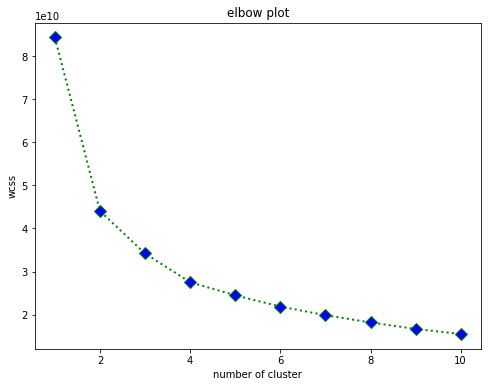

In [75]:
number_of_cluster=elbow_plot(X)


In [76]:
number_of_cluster

3

In [77]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,0.004233,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,0.007500,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,0.004733,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,0.003967,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,0.005700,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,0.003600,73.633500,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,0.004800,69.087633,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,0.005933,80.579000,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,0.010600,171.318300,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183


In [78]:
# create models folder


In [80]:
mkdir models

In [81]:
def create_cluster(X,number_of_cluster):
    data=X
    kmeans=KMeans(n_clusters=number_of_cluster,init='k-means++',random_state=42)
    y_means=kmeans.fit_predict(X)
    
    # save model
    joblib.dump(kmeans,'models/kmeans.pkl')
    
    data['Clusters']=y_means
    return data

In [83]:
df=create_cluster(X,number_of_cluster)

In [69]:
df

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Clusters
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,2
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,73.633500,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,1
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,69.087633,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,80.579000,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,2
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,171.318300,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,0


In [90]:
X['labels']=y

In [96]:
X.to_csv('data_cluster.csv', index=False)

In [97]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Clusters,labels
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,0,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,2,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,0,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,0,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,0,-1.0


In [94]:
!pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1


aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.4.1
bkcharts           

Sphinx                        4.4.0
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder                        5.1.5
spyder-kernels                2.1.3
SQLAlchemy                    1.3.24
squarify                      0.4.3
stack-data                    0.2.0
statsmodels                   0.13.2
strsimpy                      0.2.1
sympy                         1.10.1
tables                        3.6.1
tabulate                      0.8.9
tangled-up-in-unicode         0.2.0
TBB                           0.2
tblib                         1.7.0
tenacity                      8.0.1
terminado                     0.13.1
testpath                      0.5.0
text-unidecode                1.3
textdistance                  4.2.1
threadpoolctl                 2.2.0
three-merge                   0.1.1
tifffile                    